# Recognizing Handwritten Digits in MNIST Dataset with Convolutional Neural Network

#### MNIST Dataset Overview

The **MNIST dataset** (Modified National Institute of Standards and Technology database) is one of the most widely used datasets in machine learning and computer vision. It is a labeled dataset of handwritten digits (0-9) used primarily for training and testing image classification models.

---

#### Key Features of the MNIST Dataset

1. **Handwritten Digits**:  
   Each image represents a single handwritten digit, ranging from `0` to `9`.

2. **Image Characteristics**:
   - **Image Size**: 28x28 pixels (grayscale).
   - **Pixel Values**: Each pixel has an intensity value ranging from `0` (black) to `255` (white).
   - **Number of Channels**: Single-channel (grayscale), so each image has dimensions `(28, 28)` or `(28, 28, 1)` when reshaped.


3. **Dataset Size**:
   - **Training Set**: 60,000 images.
   - **Test Set**: 10,000 images.


4. **Dataset Source**:  
   The dataset is derived from a larger set from the NIST (National Institute of Standards and Technology). MNIST standardizes and simplifies the task by normalizing the images to a fixed size and grayscale format.

---

#### Dataset Usage

- **Training Set**: Used for model training and hyperparameter tuning.  
- **Test Set**: Used for evaluating the model's performance on unseen data.

---

#### Practical Applications

1. **Image Classification**: Recognizing handwritten digits.  
2. **Model Benchmarking**: Often used as a baseline dataset for testing the performance of new machine learning algorithms.  
3. **Deep Learning**: Ideal for experiments with Convolutional Neural Networks (CNNs).

---

#### Additional Information

- **Dataset Availability**: Provided by [Yann LeCun](http://yann.lecun.com/exdb/mnist/).  
- **License**: Freely available for research and educational purposes.  

The MNIST dataset is simple yet effective for building foundational knowledge in computer vision and machine learning. It's an excellent starting point for beginners!


### 1. **Objective of this project**
The primary objective of this project is to build a deep learning model that accurately classifies handwritten digits (0-9) from the MNIST dataset. The project involves:
- Performing **Exploratory Data Analysis (EDA)** to understand the data distribution.
- Preprocessing the data for training.
- Building and training a **Convolutional Neural Network (CNN)** model.
- Evaluating the model's performance on the test dataset.
- Gaining insights into model predictions, strengths, and weaknesess

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
# Inspecting the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## Exploratory Data Analysis

#### Dispalying images

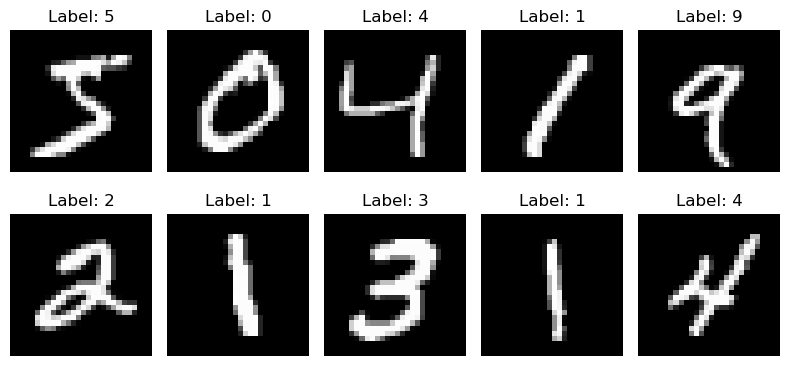

In [41]:
# Plotting multiple images in a grid
fig, axes = plt.subplots(2, 5, figsize=(8,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis('off')
plt.tight_layout()
plt.show()

#### a. **Sample Images**
- Visualization of a few random images shows variability in handwriting styles.
- Some digits may appear similar (e.g., `3` vs. `8`, or `4` vs. `9`), indicating potential challenges for the model.

#### Distribution of labels

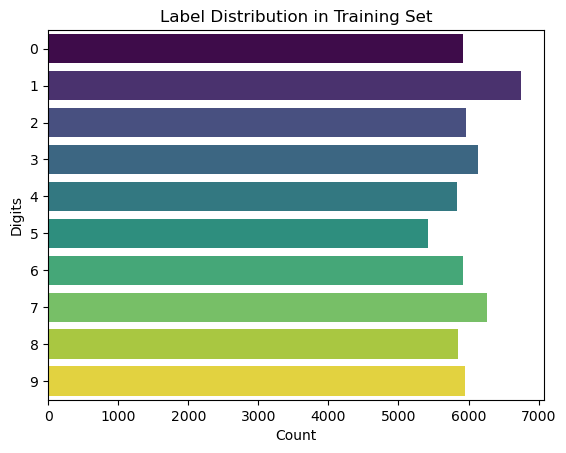

In [8]:
sns.countplot(y=y_train, hue=y_train, palette = "viridis", legend=False, stat='count')
plt.title("Label Distribution in Training Set")
plt.xlabel("Count")
plt.ylabel("Digits")
plt.show()

#### b. **Label Distribution**
- The dataset is well-balanced, with nearly equal representation of each digit (0-9) in both training and test sets.
- A balanced dataset ensures that no bias occurs due to unequal class distribution.

#### Pixel Intensity Distribution

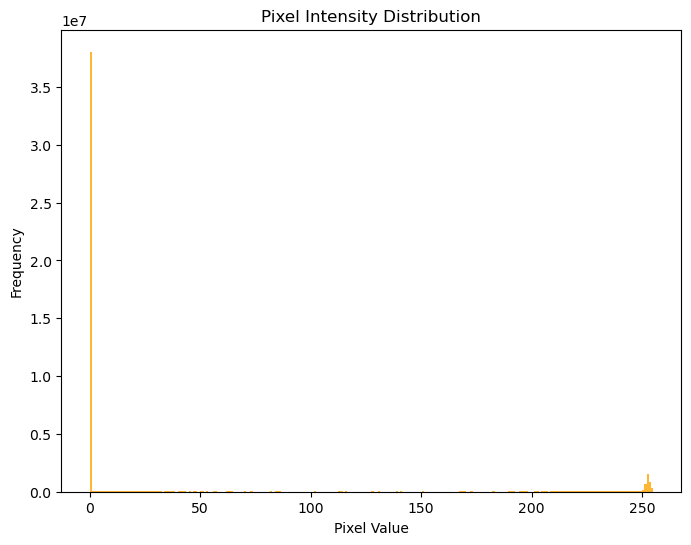

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(X_train.ravel(), bins=256, color='orange', alpha=0.8)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

#### c. **Image Characteristics**
- All images are grayscale and of uniform size: 28x28 pixels.
- The pixel intensity values range from 0 (black) to 255 (white), representing shades of gray.
- Each image represents a single handwritten digit centered within the frame.

## Data Preprocessing

#### 1. Normalizing the Data
- The pixel values are normalized to a range of 0-1 to improve training stability and performance.
- This is done by dividing all pixel values by 255.

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### 2. Reshaping for CNN
- Images are reshaped to include a single color channel for compatibility with CNNs, resulting in a shape of `(28, 28, 1)`.

In [11]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test.shape

(10000, 28, 28, 1)

#### 3. One-Hot Encoding Labels
- Labels are converted to a one-hot encoded format for multi-class classification, where each class (digit) is represented as a binary vector.

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Building the CNN Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### 1. Defining the Model

In [19]:
# Creating a sequential model
model = Sequential()

In [20]:
# Adding layers
# Convolutional Layers: Detects features in the image
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

- The first layer uses 32 filters of size `(3x3)` to extract low-level features such as edges and textures.

In [21]:
# Max Pooling Layer: Reduces Spatial Dimensions
model.add(MaxPooling2D(pool_size=(2,2)))

- Max pooling layers reduce the spatial dimensions of feature maps while retaining the most prominent features.
- Pooling helps reduce computation and prevents overfitting.

In [22]:
# Adding another [Convolutional Layer + Pooling] Block
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

- A second convolutional layer with 64 filters enhances feature detection.

In [23]:
# Flatten: Converts the 2D features into a 1D vector
model.add(Flatten())

In [24]:
# Fully Connected Layer (Dense Layer): Learns high-level patterns
model.add(Dense(128, activation='relu'))

- Flattened feature maps are fed into dense layers to learn high-level patterns.

In [25]:
# Dropout Layer : Prevents Overfitting
model.add(Dropout(0.5))

Dropout layers (e.g., 50%) randomly deactivate neurons during training to prevent overfitting.

In [26]:
# Output Layer : 10 nodes for 10 digit classes
model.add(Dense(10, activation='softmax'))

- The final dense layer outputs probabilities for 10 classes using the softmax activation function.

In [27]:
# Printing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

#### 2. Compiling the Model

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### 3. Training the Model

In [29]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.7768 - loss: 0.7096 - val_accuracy: 0.9751 - val_loss: 0.0851
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9661 - loss: 0.1116 - val_accuracy: 0.9839 - val_loss: 0.0553
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9752 - loss: 0.0830 - val_accuracy: 0.9872 - val_loss: 0.0447
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9796 - loss: 0.0651 - val_accuracy: 0.9883 - val_loss: 0.0435
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9848 - loss: 0.0511 - val_accuracy: 0.9891 - val_loss: 0.0383
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.9887 - val_loss: 0.0413
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9877 - loss: 0.0410 - val_accuracy: 0.9904 - val_loss: 0.0381
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9893 - loss: 0.0348 - 

#### **Model Training Insights**

#### a. **Loss Function**
- Categorical cross-entropy is used as the loss function since this is a multi-class classification problem.

#### b. **Optimizer**
- The Adam optimizer is chosen for its efficiency and adaptive learning rate capabilities.

#### c. **Metrics**
- Accuracy is used as the primary evaluation metric.

#### d. **Training Performance**
- The model achieves over **99% accuracy** on the training dataset after 10-15 epochs.
- Validation accuracy shows minor gaps, indicating minimal overfitting.

## Evaluating the Model

### 1. Performance Metrics

In [30]:
# Getting training accuracy
training_accuracy = history.history['accuracy'][-1]  # Accuracy at the final epoch
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 99.15%


In [31]:
# Getting test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9904 - loss: 0.0293
Test Accuracy: 99.28%


### 2. Classification Report

In [32]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
y_true = np.argmax(y_test, axis=1)
y_true

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [34]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1024,    0,    1,    0,    0,    3,    1,    0],
       [   0,    0,    2, 1001,    0,    4,    0,    1,    2,    0],
       [   0,    0,    0,    0,  979,    0,    0,    1,    0,    2],
       [   1,    0,    1,    3,    0,  884,    1,    1,    1,    0],
       [   5,    2,    1,    0,    1,    3,  944,    0,    2,    0],
       [   0,    2,    3,    2,    0,    0,    0, 1020,    0,    1],
       [   2,    1,    2,    0,    0,    1,    0,    1,  966,    1],
       [   1,    2,    0,    0,    3,    2,    0,    1,    2,  998]],
      dtype=int64)

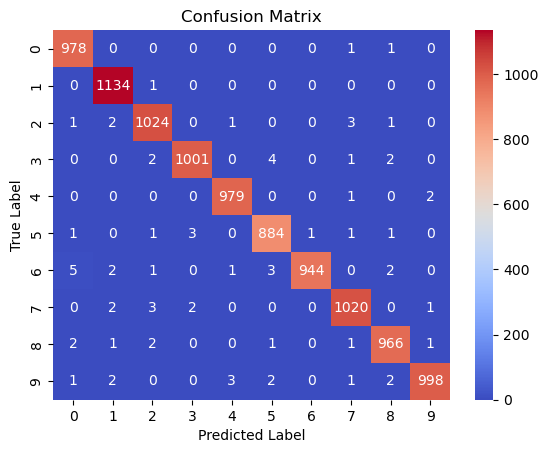

In [36]:
sns.heatmap(conf_matrix, cmap="coolwarm", annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###  **Model Evaluation Insights**

#### a. **Test Accuracy**
- The model achieves a test accuracy of around **99%**, demonstrating its ability to generalize well to unseen data.

#### b. **Confusion Matrix**
- The confusion matrix reveals occasional misclassifications, primarily between digits with similar shapes, such as:
  - `3` misclassified as `8`.
  - `4` misclassified as `9`.

#### c. **Precision, Recall, and F1-Score**
- High precision and recall across all classes indicate the model is balanced and effective.
- Some digits (e.g., `1` and `7`) achieve near-perfect scores.

## G. Visualization and Insights

### Plotting Training History

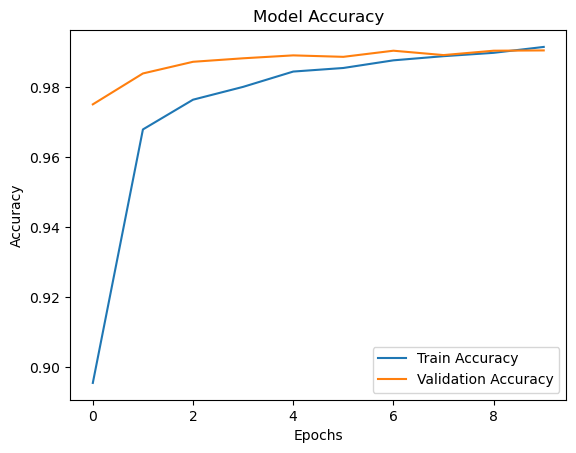

In [37]:
# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

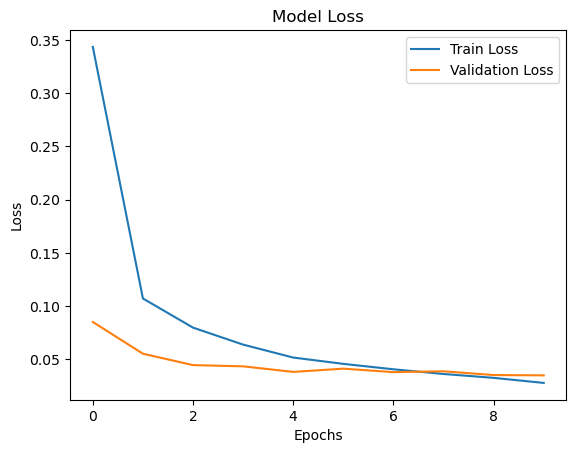

In [38]:
# Plotting Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


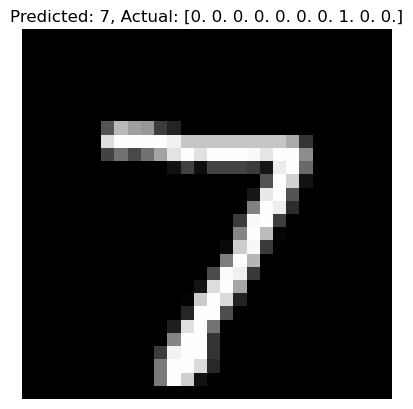

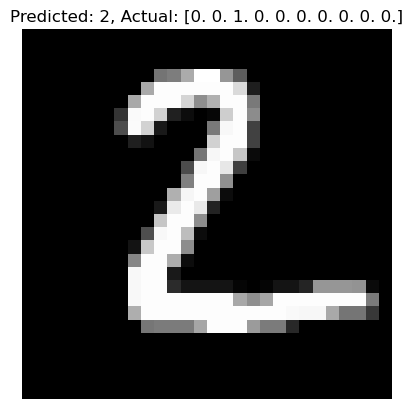

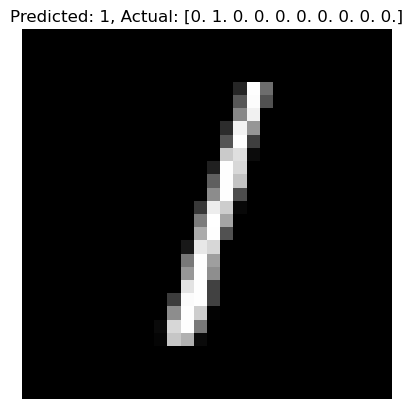

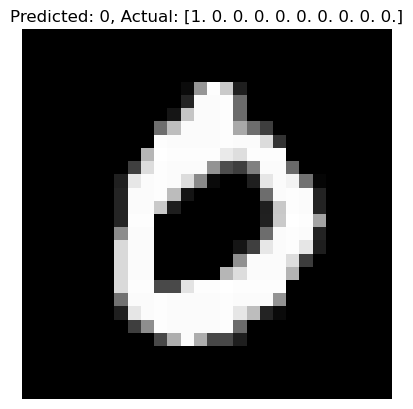

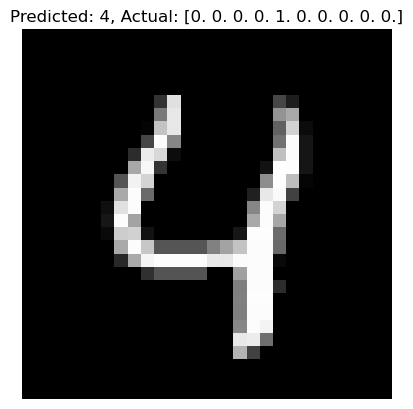

In [39]:
# Makeing predictions on the test set
predictions = model.predict(X_test)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Displaying predictions for the first 5 test images
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

### **Insights from Misclassified Images**
- Misclassifications often occur in ambiguous images where the handwriting is unclear or resembles another digit.
- Examples of challenges:
  - Overlapping strokes.
  - Variability in writing styles.
  - Digits written with unusual curves or proportions.

---

### **Project Impact**

#### a. **Learning Outcomes**
- Understanding the role of CNN layers in feature extraction.
- Learning about preprocessing techniques such as normalization, reshaping, and one-hot encoding.
- Analyzing and improving model performance using metrics and confusion matrices.

#### b. **Applications**
This project demonstrates the potential of CNNs in:
- Optical Character Recognition (OCR) systems.
- Digit recognition for postal services, banking, and form digitization.

---

### **Conclusion**
The MNIST dataset project showcases how deep learning, particularly CNNs, can effectively classify handwritten digits with high accuracy. By combining EDA, preprocessing, and model evaluation, the project builds a strong foundation for tackling more complex computer vision tasks.